CSE641 - Deep Learning - Assignment 1

PART I: Perceptron Training Algorithm - Question 2

@author: Shyama Sastha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

### Q2 a Implementation of Madeleine learning algorithm for f(x1, x2)
#### Points to be noted:
    # There are 2 inputs
    # 16 neurons in the first hidden layer - hl1
    # 5 neurons in the second hidden layer - for the 5 different regions - hl2
    # 1 neuron in the output layer classifying y as 0 or 1 - yl

In [2]:
class MadalineNetwork:
  """
  The entire Madaline network design is encapsulated by this class
  """

  def __init__(self, xn = 2, ns = 16, rs = 4, eta = 1, epochs = 100):
        """
        Init function to set the inital parameters for class variables
        Params:
            xn - number of inputs
            ns - number of neurons
            ws - weights for each of the neurons neurons
            f - a list of flags that indicate whether a neuron is flipped or not
            rs - no of regions to be classified for the second layer.
            eta - learning rate of the network
            epochs - number of times the network is going to be run for training
            s - the seed to make sure random generator doesn't generate same weights
        """
        self.xn = xn
        self.ns = ns
        self.ws = []
        self.f =[]
        self.rs = rs
        self.eta = eta
        self.epochs = epochs
        self.s = 1
        self.loadW()

  def loadW(self):
        """
        Function to load the random inital weights for the network
        Params:
            hl1 - weights for hidden layer 1
            hl2 - weights for hidden layer 2
            yl - weights for output layer
        """
        np.random.seed(self.s)
        self.s += 1
        self.ws = []
        self. f = []

        fl1 = [False for n in range(self.ns)]
        self.f.append(fl1)
        fl2 = [False for n in range(self.rs)]
        self.f.append(fl2)
        self.f.append([False])

        # For hidden layer 1 - boundary classification
        hl1 = []
        for n in range(self.ns):
            w = np.random.randn(self.xn)
            hl1.append(w)
        hl1.append(np.random.randn(1)[0]) # To account for bias value
        self.ws.append(hl1)

        # For hidden layer 2 - region classification
        hl2 = []
        for r in range(self.rs):
            w = np.random.randn(self.rs)
            hl2.append(w)
        hl2.append(np.random.randn(1)[0])
        self.ws.append(hl2)

        # For the final output layer
        yl = []
        w = np.random.randn(self.rs)
        yl.append(w)
        yl.append(np.random.randn(1)[0])
        self.ws.append(np.array(yl)) # Converting to array to maintain the format of the weights

  def fit(self, x):
        """
        Function to do a forward propagation of weights and predict output
        Params:
            x - input sample
        Return: output as 0 or 1
        """
        hl1 = self.ws[0]
        hl1o = [] # Outputs for all neurons in hl1
        for n in range(self.ns):
            z = np.dot(hl1[n].T, x) + hl1[-1]
            o = 1 if z > 0 else 0
            if self.f[0][n]:
                o = 1 if o == 0 else 1
            hl1o.append(o)

        hl2 = self.ws[1] # Outputs for all neurons of hl2
        i = 0 # Variable to keep track of regions so only 4 outputs for first layer go to one neuron in the second layer
        hl2o = []
        for r in range(self.rs):
            z = np.dot(hl2[r].T, hl1o[i:i+4]) + hl2[-1]
            o = 1 if z > 0 else 0
            if self.f[1][r]:
                o = 1 if o == 0 else 1
            hl2o.append(o)
            i += 4

        yl = self.ws[2]
        z = np.dot(yl[0].T, hl2o) + yl[-1]
        o = 1 if z > 0 else 0
        if self.f[2][0]:
            o = 1 if o == 0 else 1

        return o # Final output of the network

  def train(self, X, y, l):
      '''
      Function to train the Madaline network model
      Params:
              x - inputs
              y - desired outputs
              l - list to keep trach of loss per epoch
      '''
      for epoch in range(self.epochs):
          e = 0
          for x, d in zip(X, y):
              y_hat = self.fit(x)
              e += abs(d - y_hat)
              if d - y_hat != 0:
                self.Madaline(x, d)
          l.append(e/144)

  def Madaline(self, x, d):
        """
          Function to apply madaline algorithm and update weights accordingly
          Params:
                  x - input sample
                  d - desired output
          Return: None
        """
        hl1 = self.ws[0]
        hl1z = [] # z values for all neurons in hl1
        hl1o = [] # Outputs for all neurons in hl1
        for n in range(self.ns):
              #print(hl1)
              z = np.dot(hl1[n].T, x) + hl1[-1]
              hl1z.append(z)
              o = 1 if z > 0 else 0
              hl1o.append(o)

        hl2 = self.ws[1]
        hl2z = [] # z values for all neurons in hl2
        hl2o = [] # Outputs for all neurons in hl2
        i = 0
        for r in range(self.rs):
            z = np.dot(hl2[r].T, hl1o[i:i+4]) + hl2[-1]
            hl2z.append(z)
            o = 1 if z > 0 else 0
            hl2o.append(o)
            i += 4

        yl = self.ws[2]
        ylz = [] # z vlaues for all neurons in yl
        z = np.dot(yl[0].T, hl2o) + yl[-1]
        ylz.append(z)

        zc = hl1z + hl2z + ylz # List of all z values

        ut = True # Flag to check if a neuron is untested
        for i in range(len(zc)):
            mz = min(zc) # Smallest affine z value
            if mz in hl1z:
                flag = (0, hl1z.index(mz)) # Index of the neuron is stored if flipped
            elif mz in hl2z:
                flag = (1, hl2z.index(mz)) # Index of the neuron is stored if flipped
            else:
                flag = (2, ylz.index(mz)) # Index of the neuron is stored if flipped
            if d == self.fit(x): # Check if the flipping of neuron helped change prediction
                n = flag[1]
                if flag[0] == 0:
                    dd = 1 if hl1o[flag[1]] == 0 else 0 # Take flipped output as desired output
                    self.ws[0][n] += self.eta * (dd - hl1z[n]) * x
                    self.ws[0][-1] += self.eta * (dd - hl1z[n])
                    self.f[0][n] = True
                elif flag[0] == 1:
                    dd = 1 if hl1o[flag[1]] == 0 else 0 # Take the flipped output as desired output
                    self.ws[1][n] += self.eta * (dd - hl2z[n]) * np.array(hl1o).T
                    self.ws[1][-1] += self.eta * (dd - hl2z[n])
                    self.f[1][n] = True
                else:
                    self.ws[2][0] += self.eta * (d - ylz[0]) * np.array(hl2o).T
                    self.ws[2][-1] += self.eta * (d - ylz[0])
                    self.f[2][0] = True
                ut = False
                break
            else:
                zc.remove(mz) # To find the next smallest affine z value

        if ut:
            self.loadW()

C:\Users\Sastha\AppData\Local\Temp/ipykernel_5300/2928887995.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.ws.append(np.array(yl)) # Converting to array to maintain the format of the weights



The weights of the entire Madaline network are: 

[[array([-2.70772139,  0.01386182]), array([-0.29432879, -0.19583848]), array([0.53272977, 1.34825246]), array([0.78397594, 0.44302677]), array([-0.84985809,  1.86259709]), array([-0.55489882, -0.32320532]), array([-0.10763334, -1.40487208]), array([1.63742918, 1.14552797]), array([-0.20718955, -0.77689448]), array([ 0.92687199, -0.90872227]), array([-0.63364327, -0.25507954]), array([-0.72007382,  0.67032108]), array([-0.19317192,  1.83637679]), array([-0.51061205,  1.62255396]), array([ 0.66465645, -0.75394141]), array([-1.67433869,  1.18737347]), -0.18979349888038735], [array([-0.66402248, -2.06216513,  0.77222325, -0.3705808 ]), array([-0.34947163, -0.9192828 , -0.38635028, -0.80960141]), array([ 0.95871815, -1.32470018, -1.28525764, -0.95854074]), array([ 2.01193417, -0.04066358,  0.92375123, -0.78965971]), 0.45934762454022093], array([array([-1.18552661,  0.52320338, -0.70078867,  0.10042152]),
       -0.6804365345653282], dtype=

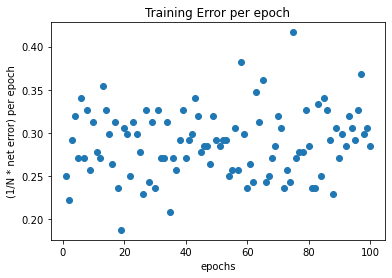

In [3]:
# Input sample space of 12x12 - 144 inputs
X = []
for i in np.arange(0, 12, 1):
    for j in np.arange(0, 12, 1):
        X.append([i, j])

# Outputs desired for the 144 points in X
d = []
for i in X:
    x1, x2 = i
    if (((x1 >= 4 and x1 <= 6) and (x2 >= 0 and x2 <= 2)) or
      ((x1 >= 4 and x1 <= 6) and (x2 >= 4 and x2 <= 6)) or
      ((x1 >= 4 and x1 <= 6) and (x2 >= 8 and x2 <= 10)) or
      ((x1 >= 0 and x1 <= 2) and (x2 >= 4 and x2 <= 6)) or
      ((x1 >= 8 and x1 <= 10) and (x2 >= 4 and x2 <= 6))):
        d.append(1)
    else:
        d.append(0)

# Initializing the network
mn = MadalineNetwork(xn = 2, ns = 16, rs = 4, eta = 1, epochs = 100)

# Creating a list to store the loss in network training in terms of (net error per epoch/total number of samples in an epoch)
loss = []
mn.train(X,d,loss) # Train the network

# Computing the graph of training loss
epochs = [i for i in range(1,101)]
plt.scatter(epochs, loss, label='training error')
plt.xlabel('epochs')
plt.ylabel('(1/N * net error) per epoch')
plt.title("Training Error per epoch")
plt.savefig("training_error_Madaline.pdf")

print("\nThe weights of the entire Madaline network are: \n")
print(mn.ws)
print('\n')
y_pred = []
E = 0
cp = 0 # Correct predictions
for x, y in zip(X,d):
    y_hat = mn.fit(x)
    y_pred.append(y_hat)
    E += abs(y - y_hat)
    if (y == y_hat):
        cp += 1

#joblib.dump(mn, "Madaline")

print("The total squared error for {} epochs of dataset of size {} = {}\n".format(100, len(d), (1/144 * E ** 2)))
print("Accuracy = {}".format(cp/144))

The weights of the entire Madaline network are: 

hl1 - [array([-2.70772139,  0.01386182]), array([-0.29432879, -0.19583848]), array([0.53272977, 1.34825246]), array([0.78397594, 0.44302677]), array([-0.84985809,  1.86259709]), array([-0.55489882, -0.32320532]), array([-0.10763334, -1.40487208]), array([1.63742918, 1.14552797]), array([-0.20718955, -0.77689448]), array([ 0.92687199, -0.90872227]), array([-0.63364327, -0.25507954]), array([-0.72007382,  0.67032108]), array([-0.19317192,  1.83637679]), array([-0.51061205,  1.62255396]), array([ 0.66465645, -0.75394141]), array([-1.67433869,  1.18737347]), -0.18979349888038735]
hl2 -  [array([-0.66402248, -2.06216513,  0.77222325, -0.3705808 ]), array([-0.34947163, -0.9192828 , -0.38635028, -0.80960141]), array([ 0.95871815, -1.32470018, -1.28525764, -0.95854074]), array([ 2.01193417, -0.04066358,  0.92375123, -0.78965971]), 0.45934762454022093]
yl - [array([array([-1.18552661,  0.52320338, -0.70078867,  0.10042152]), -0.6804365345653282]


The total squared error for 100 epochs of dataset of size 144 = 14.0625

Accuracy = 0.6875

Q2.b. No, it is not possible compute f(x1, x2) in 2 neurons because:
    # There are multiple boundary conditions.
    # Every shaded area corresponds to 1 while there are unshaded regions inbetween.
    # This means a minimum of 6 vertical boundaries and 6 horizontal boundaries are required to identify the right regions.
    # Then to actually figure out the bounds for each square, 4 more neurons are needed.
        # Note: It is not 5 because the middle box will be bounded when the top and bottom and the left and right are computed.
    # And a neuron is required to make up for the OR condition from the 4 outputs to get a final outcome.